In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Question A.**

The highest average rating is: 4.82
 The mean rating value is: 4.002191000000001


[Text(0.5, 0, 'Average Rating')]

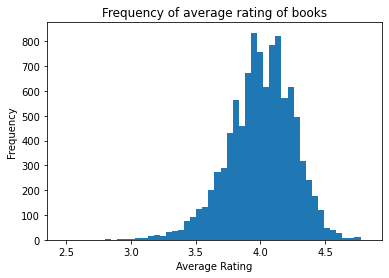

In [ ]:
books = pd.read_csv("books.csv")
max = books.average_rating.max() #Highest average rating. 
print(f"The highest average rating is: {max}")
mean =  books.average_rating.mean() # Mean value
print(f"The mean rating value is: {mean}")
ax = books.average_rating.plot(kind = "hist", bins = 50, xlabel = "Average Rating", ylabel = "Frequency", title = "Frequency of average rating of books")
ax.set(xlabel = "Average Rating")
graph = books.average_rating.plot.kde()

[Text(0.5, 0, 'Average Rating')]

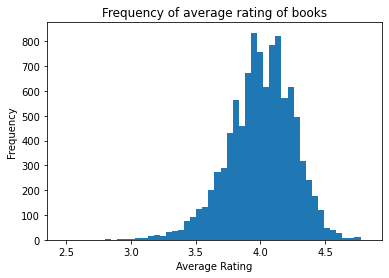

In [ ]:
ax = books.average_rating.plot(kind = "hist", bins = 50, xlabel = "Average Rating", ylabel = "Frequency", title = "Frequency of average rating of books")
ax.set(xlabel = "Average Rating")

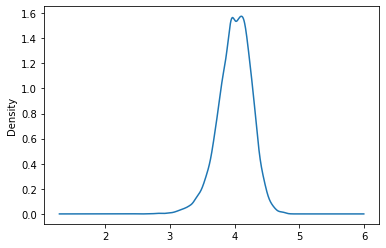

In [ ]:
graph = books.average_rating.plot.kde()

**Question B.**

original_publication_year
1901.0      4
1902.0      6
1903.0      4
1904.0      6
1905.0      6
         ... 
2013.0    518
2014.0    437
2015.0    306
2016.0    198
2017.0     11
Length: 117, dtype: int64

The maximum number of books were published in the year 2012.0 and the count is 568
The minimumm number of books were published in the year 1907.0 and the count is 2
The top five years in publishing maximum books are:
2012.0    568
2011.0    556
2013.0    518
2010.0    473
2014.0    437
Name: original_publication_year, dtype: int64


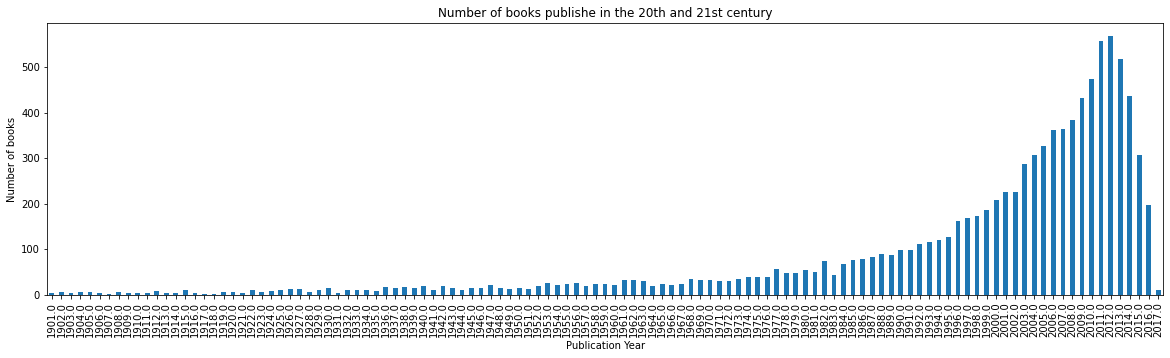

In [ ]:
publish = books.query("`original_publication_year` > 1900").groupby('original_publication_year').size().plot(kind = "bar", title = "Number of books publishe in the 20th and 21st century", figsize = (20, 5), rot = 90)
publish.set(xlabel = "Publication Year", ylabel = "Number of books")
print(books.query("`original_publication_year` > 1900").groupby('original_publication_year').size(), end = "\n\n")
maxyear = books.query("`original_publication_year` > 1900").groupby('original_publication_year').size().idxmax() #year in which max books were published.
maxbooks = books.query("`original_publication_year` > 1900").groupby('original_publication_year').size().max() #max books published in year.
top = books.original_publication_year.value_counts().head() # top 5 years in which maximum books were published
minyear = books.query("`original_publication_year` > 1900").groupby('original_publication_year').size().idxmin() #year in which min books were published.
minbooks = books.query("`original_publication_year` > 1900").groupby('original_publication_year').size().min() # min books published 
print(f"The maximum number of books were published in the year {maxyear} and the count is {maxbooks}") 
print(f"The minimumm number of books were published in the year {minyear} and the count is {minbooks}")
print(f"The top five years in publishing maximum books are:\n{top}")

**Question C.**

Number of books written by authors:
Stephen King                        26
Nicholas Sparks                     14
Rick Riordan                        11
Charlaine Harris                    10
Cassandra Clare                      9
                                    ..
Robert Jordan, Brandon Sanderson     2
Donna Tartt                          2
Harper Lee                           2
Amy Tan                              2
Gayle Forman                         2
Name: authors, Length: 137, dtype: int64

Mean of all the average ratings recieved for all the books written by the author:
 Stephen King                        3.976923
Nicholas Sparks                     4.040000
Rick Riordan                        4.340000
Charlaine Harris                    4.007000
Cassandra Clare                     4.332222
                                      ...   
Robert Jordan, Brandon Sanderson    4.380000
Donna Tartt                         3.970000
Harper Lee                          3.780000
Amy T

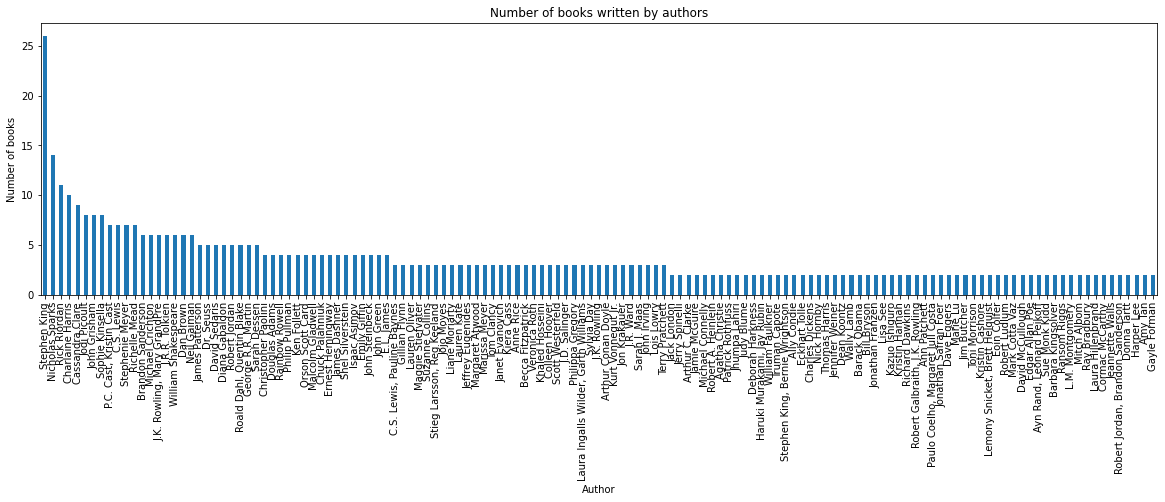

In [ ]:
smpbooks = books.loc[1:1000]
unique = smpbooks.authors.value_counts()
unique = unique[unique.gt(1)]
print(f"Number of books written by authors:\n{unique}", end = "\n\n")
gph = unique.plot(kind = "bar", figsize = (20, 5), rot = 90, title = "Number of books written by authors")
gph.set(xlabel = "Author", ylabel = "Number of books")
idc = unique.index
mnbooks = pd.Series(np.zeros(len(idc)), index = idc)
stdbooks = pd.Series(np.zeros(len(idc)), index = idc)
for name in idc:
  mnbooks[name] = smpbooks[smpbooks['authors'] == name]["average_rating"].mean()
print(f"Mean of all the average ratings recieved for all the books written by the author:\n{mnbooks}", end = "\n\n")
for name in idc:
  stdbooks[name] = smpbooks[smpbooks['authors'] == name]["average_rating"].std()
print(f"Standard deviation of all the averge ratings recieved for all the books written by the author:\n{stdbooks}")

[Text(0, 0.5, 'Mean rating'), Text(0.5, 0, 'Author')]

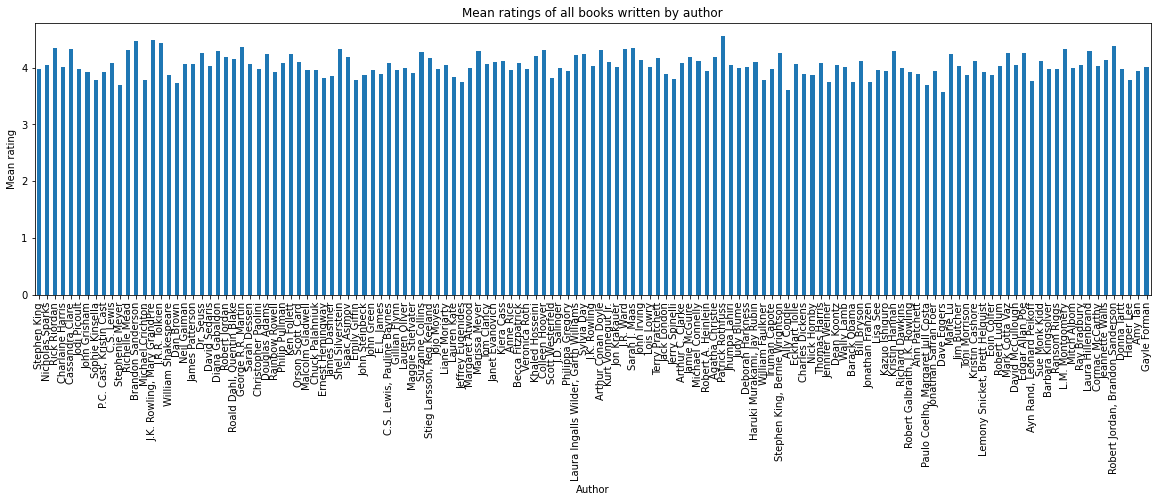

In [ ]:
ax = mnbooks.plot(kind = "bar", figsize = (20, 5), rot = 90, title = "Mean ratings of all books written by author")
ax.set(xlabel = "Author", ylabel = "Mean rating")


[Text(0, 0.5, 'Standard deviation of ratings'), Text(0.5, 0, 'Author')]

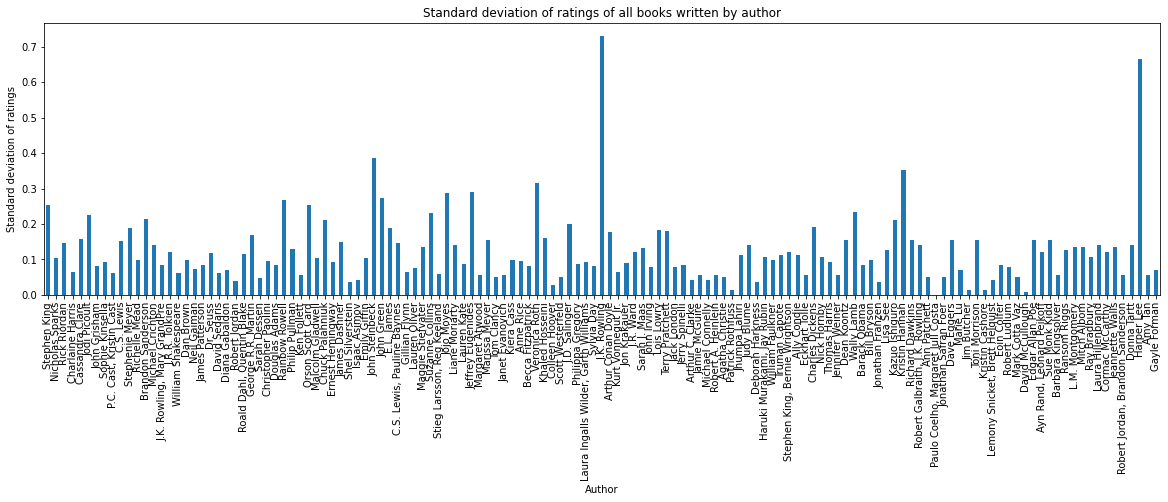

In [ ]:
ay = stdbooks.plot(kind = "bar", figsize = (20, 5), rot = 90, title = "Standard deviation of ratings of all books written by author")
ay.set(xlabel = "Author", ylabel = "Standard deviation of ratings")

Text(0.5, 1.0, 'Mean ratings of authors vs number of books')

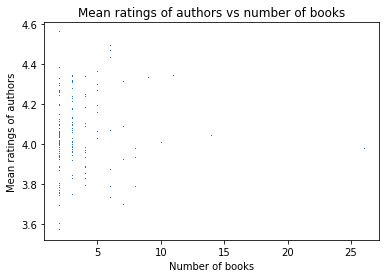

In [ ]:
plt.plot(unique, mnbooks, ',')
plt.xlabel("Number of books")
plt.ylabel("Mean ratings of authors")
plt.title("Mean ratings of authors vs number of books")

**Question E.**

Text(0.5, 1.0, 'Number of editions vs the average rating recieved by book')

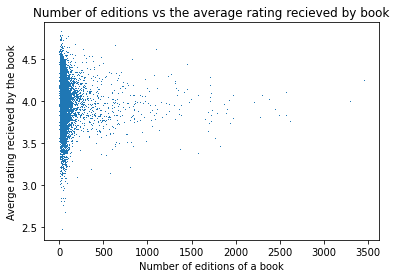

In [ ]:
books = pd.read_csv("books.csv")
plt.plot(books.books_count, books.average_rating, ',')
plt.xlabel("Number of editions of a book")
plt.ylabel("Averge rating recieved by the book")
plt.title("Number of editions vs the average rating recieved by book")

**Question D.**

In [ ]:
ratings = pd.read_csv("ratings.csv")
smpratings = ratings.loc[1:100000]
users = smpratings.user_id.value_counts()
idc = users.index
mnratings = pd.Series(np.zeros(len(idc)), index = idc)
for user in idc:
  mnratings[user] = smpratings[smpratings['user_id'] == user]["rating"].mean()
stdratings = pd.Series(np.zeros(len(idc)), index = idc)
for user in idc:
  stdratings[user] = smpratings[smpratings['user_id'] == user]["rating"].std()
varratings = pd.Series(np.zeros(len(idc)), index = idc)
for user in idc:
  varratings[user] = smpratings[smpratings['user_id'] == user]["rating"].var()

2276    185
2501    172
1794    171
1350    171
2948    165
       ... 
743       1
2180      1
2893      1
2175      1
2088      1
Name: user_id, Length: 1806, dtype: int64
1806
2276    3.524324
2501    4.354651
1794    4.555556
1350    3.970760
2948    3.812121
          ...   
743     2.000000
2180    2.000000
2893    5.000000
2175    4.000000
2088    5.000000
Length: 1806, dtype: float64
2276    0.950230
2501    0.849376
1794    0.847912
1350    1.160258
2948    0.793171
          ...   
743          NaN
2180         NaN
2893         NaN
2175         NaN
2088         NaN
Length: 1806, dtype: float64
2276    0.902938
2501    0.721440
1794    0.718954
1350    1.346199
2948    0.629120
          ...   
743          NaN
2180         NaN
2893         NaN
2175         NaN
2088         NaN
Length: 1806, dtype: float64


Text(0.5, 1.0, 'Frequency of user ratings and the mean value of ratings by them')

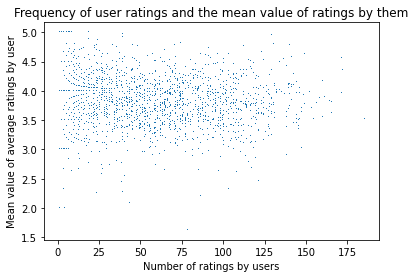

In [ ]:
plt.plot(users, mnratings, ",")
plt.xlabel("Number of ratings by users")
plt.ylabel("Mean value of average ratings by user")
plt.title("Frequency of user ratings and the mean value of ratings by them")

Here there is little variation, the users who have rated less books, tend to give higher ratings to the books than the users who have rated more books. Also, it is interesting to note that there are straight lines at the ratings 3, 3.5, 4, 4.5 and 5 which shows that there is not much variation in there ratings, whereas as the user experience increases the ratings are more scattered. 

Text(0.5, 1.0, 'Frequency of user ratings and the standard deviation of ratings by them')

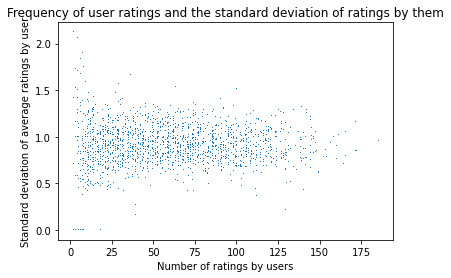

In [ ]:
plt.plot(users, stdratings, ",") 
plt.xlabel("Number of ratings by users")
plt.ylabel("Standard deviation of average ratings by user")
plt.title("Frequency of user ratings and the standard deviation of ratings by them")

Text(0.5, 1.0, 'Frequency of user ratings and the variance of ratings by them')

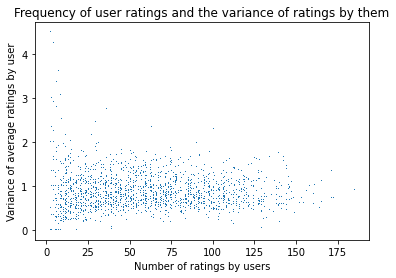

In [ ]:
plt.plot(users, varratings, ",")
plt.xlabel("Number of ratings by users")
plt.ylabel("Variance of average ratings by user")
plt.title("Frequency of user ratings and the variance of ratings by them")

not very useful

**Question G.**

In [ ]:
"""import regex
for title in books.title:
  if len(series := title.split("(")) == 2:
    print(series[1].split(", #")[0])"""

"""import re
for title in books.title:
  title.split("(")[1].split(";")
  if matches := re.search(r"\((.+), *#[0-9]+", title):
    print(matches.groups()[0])"""

"""idx = series.index
print(len(idx))
meanratings = pd.Series(np.zeros(len(idx)), index = idx)
for volume in idx:
  meanratings[volume] = books[books['title'] == volume]["average_rating"].mean()
print(meanratings)"""
import re
l = []
for title in books.title:
  if len(title := title.split("(")) == 2:
    title = title[1]
  else: continue
  for t in title.split("; "):
    if matches := re.search(r"(.+), *#[0-9]+", t):
      l.append(matches.groups()[0])

series = pd.DataFrame(l).value_counts()
print(series)


In Death                41
Discworld               40
Stephanie Plum          28
Harry Bosch Universe    26
Hercule Poirot          25
                        ..
Necessary Lies           1
Necroscope               1
Negeri 5 Menara          1
Broken                   1
Ορέστεια                 1
Length: 1614, dtype: int64

**Question F.**

In [ ]:
toprate = books.nlargest(13, "average_rating").dropna()
toprate = toprate[["books_count", "authors", "original_publication_year", "original_title", "average_rating"]]
toprate

,books_count,authors,original_publication_year,original_title,average_rating
3627,14,Bill Watterson,2005.0,The Complete Calvin and Hobbes,4.82
861,34,Brandon Sanderson,2014.0,Words of Radiance,4.77
8853,6,Francine Rivers,1993.0,Mark of the Lion Trilogy,4.76
4482,21,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,4.75
421,76,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,4.74
6360,22,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,4.74
3752,6,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",4.73
6589,21,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,4.73
6919,19,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes: A Calvin ...,4.73
9565,24,Bill Watterson,1992.0,Attack of the Deranged Mutant Killer Monster S...,4.72


Top 10 books that have recieved highest average rating. We can see that books by Bill Watterson and J.K. rowling are in the top. 

In [ ]:
toprate = books.nlargest(13, "average_rating").dropna()
toprate = toprate[["books_count", "authors", "original_publication_year", "original_title", "average_rating"]]
toprate

,books_count,authors,original_publication_year,original_title,average_rating
3627,14,Bill Watterson,2005.0,The Complete Calvin and Hobbes,4.82
861,34,Brandon Sanderson,2014.0,Words of Radiance,4.77
8853,6,Francine Rivers,1993.0,Mark of the Lion Trilogy,4.76
4482,21,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,4.75
421,76,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,4.74
6360,22,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,4.74
3752,6,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",4.73
6589,21,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,4.73
6919,19,Bill Watterson,1992.0,The Indispensable Calvin and Hobbes: A Calvin ...,4.73
9565,24,Bill Watterson,1992.0,Attack of the Deranged Mutant Killer Monster S...,4.72
